# Learning AWS Batch

**What it does**: Allows you to create computing jobs on the cloud. Amazon computers (EC2) will complete the job and you can recieve the results. 

**Work flow**:
1. Retrieve input data from AWS bucket.
2. Submit a job that analyzes the given input data.
3. Once job finishes, EC2 instance can store output results?
4. User can then retrieve results from the cloud (I'm guessing from another bucket). 

## Setup: 
http://docs.aws.amazon.com/batch/latest/userguide/Batch_GetStarted.html  
https://boto3.readthedocs.io/en/latest/guide/quickstart.html
1. Should have: AWS account (duh), IAM User, boto3/awscli installed.

## Simple Example:
In this simple test, I will attempt to start a job process using AWS Batch. The job will not depend on any input data or other parameters.


In [3]:
import boto3
# low level client that can access AWS batch methods
client = boto3.client("batch")

In [2]:
# create Compute Environments
# Compute environments contain the EC2 instances that are used to run batch jobs. You will map a compute environment
# to a job queue. The job queue has a scheduler that helps plan out which EC2 instances are ready to take a job.

response = client.create_compute_environment(
    computeEnvironmentName= "Test_Env",
    type= 'Managed', # managed means AWS will manage the computing resources that you specify
    state= 'ENABLED', # enable your computing environment
    computeResources={
        'type': 'EC2'|'SPOT',
        'minvCpus': 1, #min number of cpus environment should maintain.
        'maxvCpus': 5, #max number of cpus environment should maintain.
        'desiredvCpus': 3,
        'instanceTypes': ['c4.large'], #type of instances allowed to run.
        'subnets': ['subnet-220c0e0a'] #this is a thing
        'securityGroupIds': ['sg-cf5093b2'], #this is also a thing
        'instanceRole': 'ecsInstanceRole'
    },
    serviceRole= 'string'
)
print response

In [4]:
# create job queue (this is where AWS will store your jobs until an EC2 Instance is available to run them)
response = client.create_job_queue(
    jobQueueName='test_queue',
    state='ENABLED',
    priority=1,
    computeEnvironmentOrder=[
        {
            'order': 1,
            'computeEnvironment': 'test_batch'
        },
    ]
)

print response

{u'jobQueueArn': u'arn:aws:batch:us-east-1:389826612951:job-queue/test_queue', 'ResponseMetadata': {'RetryAttempts': 0, 'HTTPStatusCode': 200, 'RequestId': '3c73fb6d-022c-11e7-b707-1768a71d5ff7', 'HTTPHeaders': {'x-amzn-requestid': '3c73fb6d-022c-11e7-b707-1768a71d5ff7', 'content-length': '103', 'via': '1.1 33ea49e9d525be4d0ab838be605fd6d0.cloudfront.net (CloudFront)', 'x-cache': 'Miss from cloudfront', 'x-amzn-trace-id': 'Root=1-58bcf0fb-eb532ba796f5cc9abe38c722', 'connection': 'keep-alive', 'x-amz-cf-id': 'y6832nF1UfxMw7cOVfIaH6yt3G21y9iVyVy694UBNcdol-N1gifyhA==', 'date': 'Mon, 06 Mar 2017 05:17:47 GMT', 'content-type': 'application/json'}}, u'jobQueueName': u'test_queue'}


In [15]:
# job description: specifies how the jobs are run (required field for jobs)
# special attributes you can attach: Docker images to use with the job, a command (can be overwritten during runtime)
# environment variables, data volumes, etc
response = client.register_job_definition(
    type='container',
    containerProperties={
        'command': [
            'echo',
            'Hello World',
        ],
        'image': 'busybox', # docker image with basic UNIX utils
        'memory': 128,
        'vcpus': 1,
    },
    jobDefinitionName='echoMsg',
)

print(response)

{u'jobDefinitionArn': u'arn:aws:batch:us-east-1:389826612951:job-definition/echoMsg:2', u'jobDefinitionName': u'echoMsg', 'ResponseMetadata': {'RetryAttempts': 0, 'HTTPStatusCode': 200, 'RequestId': '8bf64e6a-0230-11e7-96c7-43e8595d1439', 'HTTPHeaders': {'x-amzn-requestid': '8bf64e6a-0230-11e7-96c7-43e8595d1439', 'content-length': '127', 'via': '1.1 c4ff8a7ab32ae47f65347ecd5f30a4e6.cloudfront.net (CloudFront)', 'x-cache': 'Miss from cloudfront', 'x-amzn-trace-id': 'Root=1-58bcf836-1e6c6db13a063e0ff8c84861', 'connection': 'keep-alive', 'x-amz-cf-id': 'bxYv-nwcR6gT-cyxzFwVXyESNEB3Afu46EIX8wQsxJthXcAI7amooQ==', 'date': 'Mon, 06 Mar 2017 05:48:38 GMT', 'content-type': 'application/json'}}, u'revision': 2}


In [6]:
#submit a job
response = client.submit_job(
    jobDefinition='echoMsg',
    jobName='test',
    jobQueue='test_queue',
    containerOverrides={
        'command': ['echo', 'NEURODATA']
    }
)

print response

{u'jobName': u'test', 'ResponseMetadata': {'RetryAttempts': 0, 'HTTPStatusCode': 200, 'RequestId': '283b37f2-022e-11e7-a28b-1fdf52ca726b', 'HTTPHeaders': {'x-amzn-requestid': '283b37f2-022e-11e7-a28b-1fdf52ca726b', 'content-length': '65', 'via': '1.1 316430958c7664ce84a9544466b4155f.cloudfront.net (CloudFront)', 'x-cache': 'Miss from cloudfront', 'x-amzn-trace-id': 'Root=1-58bcf434-e4dc521e29be279d6fea393d', 'connection': 'keep-alive', 'x-amz-cf-id': 'Gdq4wVfgBSiqLK-Lj5g9dHfSCGVMCkZyYcpTm6cZEPCeTOdxki1lpg==', 'date': 'Mon, 06 Mar 2017 05:31:32 GMT', 'content-type': 'application/json'}}, u'jobId': u'15bcf7c4-871f-406f-af4e-8f6aa43d1d68'}


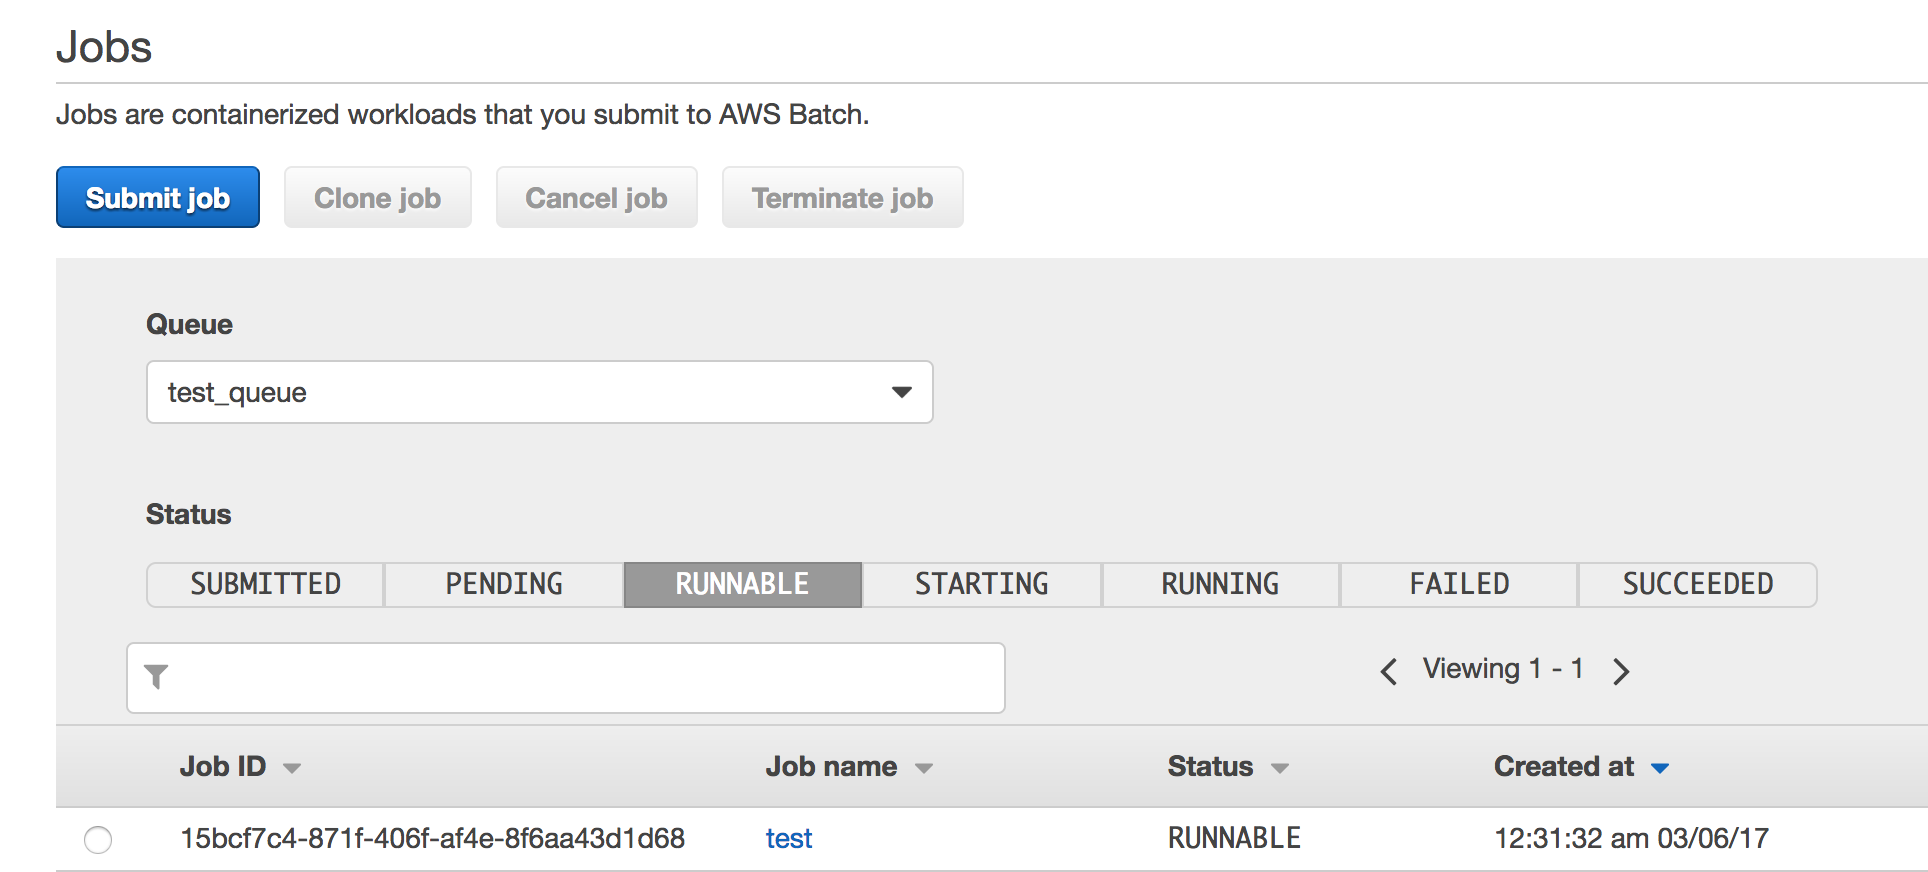

In [13]:
from IPython.display import Image
Image('../../Desktop/proof.png')